In [5]:
from glob import glob
import numpy as np 
import pandas as pd
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')

import argparse
import gc
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from piece_detector import *

In [6]:
detector = Detector()


In [7]:
img1 = cv2.imread('p2.png',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('p1.png',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

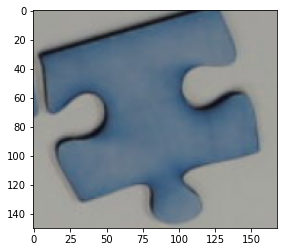

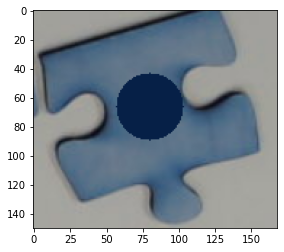

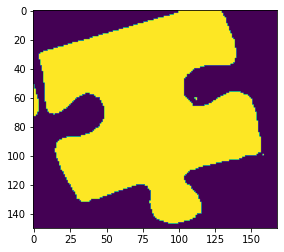

In [8]:
img1 = cv2.imread('p1.png')
plt.imshow(img1)
plt.show()
plt.imshow(detector.process(img1)[0])
plt.show()
img_m1 = detector.pieces[0].img
plt.imshow(img_m1)
plt.show()

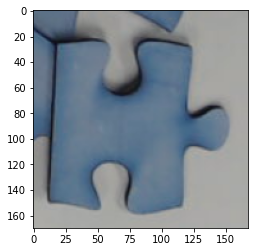

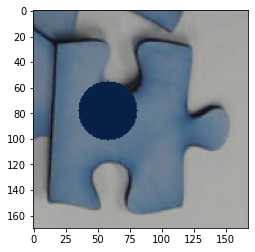

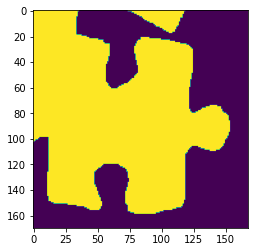

In [10]:
img1 = cv2.imread('p2.png')
plt.imshow(img1)
plt.show()
plt.imshow(detector.process(img1)[0])
plt.show()
img_m2 = detector.pieces[0].img
plt.imshow(img_m2)
plt.show()

In [79]:
orb = cv2.xfeatures2d.SIFT_create(nfeatures = 100000000)#
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img_m1,None)
kp2, des2 = orb.detectAndCompute(img_m2,None)

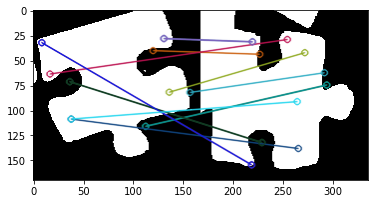

(<matplotlib.image.AxesImage at 0x1f002d64460>, None)

In [80]:
## create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img_m1,kp1,img_m2,kp2,matches[:],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [81]:
good = matches
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img_m1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(img_m2,[np.int32(dst)],True,125,1, cv2.LINE_AA)

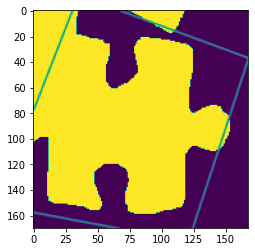

In [82]:
plt.imshow(img2)

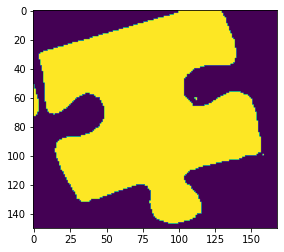

In [83]:
plt.imshow(img_m1)